# Maternal Health Risk Assessment: A Comprehensive Model of Predictive Factors

### Introduction:

According to the World Health Organization (WHO), maternal health can be defined as “the health of women during pregnancy, childbirth and the postnatal period. Each stage should be a positive experience, ensuring women and their babies reach their full potential for health and well-being” (WHO). The commitment to improving maternal health is not only a priority for organizations like WHO but also a central goal in the post-2015 framework for sustainable development, highlighting its enduring significance in shaping global progress.  This commitment is intricately linked to the broader context of reducing inequality, thereby promoting social justice. By addressing disparities in the quality and outcomes of care from country to country, especially in third world countries that have higher maternal health risks, there is a dedication to ensuring fair and equal opportunities for all women, irrespective of their background or geographical location.


In essence, organizations like WHO who see maternal health as key priority translates into contributing to the effort of reducing maternal health risks by, for example, “increasing research evidence, providing evidence-based clinical and programmatic guidance, setting global standards, and providing technical support to Member States on developing and implementing effective policy and programmes” (WHO). This is why recognizing the gravity of this issue is a palpable urgency to employ innovative approaches for mitigation. A potential avenue of impactful intervention lies in the development of a predictive model. This model holds the potential to discern high-risk patients among pregnant women, thereby empowering healthcare providers to allocate resources to enhance the likelihood of successful outcomes for both mothers and their newborns. 


In this report we will answer the question: Can we determine, with precision, whether a pregnant woman faces low, medium, or high maternal health risk based on key variables such as age, systolic blood pressure, diastolic blood pressure, blood glucose, body temperature, and heart rate? To answer this question, this report uses as its foundation a dataset gathered from 1013 pregnant women. This dataset represents a diverse cross-section, sourced from hospitals, clinics, and maternal health care centers embedded in the rural landscapes of Bangladesh. Each data point encapsulates the variables of interest, forming the basis for our robust predictive model. The dataset contains overall 7 columns for: age, systolic blood pressure, diastolic blood pressure, blood glucose (BS), body temperature, heart rate, and the risk classification. Age is given in years, systolic and diastolic blood pressure in mmHg, blood glucose in mmol/L, body temperature in degrees Fahrenheit, heart rate in bpm, and risk level as a categorical variables for three classifications: low risk, medium risk, and high risk. 


#### Methods & Results

Data analysis

We are reading the dataset from UCI Machine Learning Repository from the Web to R with the following steps. In summary, we need to download the file, unzip, give it a new name and read the first 6 rows.

Data selection:

Based on the data analysis, it has become apparent that the temperature variable does not significantly contribute to distinguishing between high, medium and low-risk patients. The temperature remains within the same range for all risk groups. Therefore, it would be misleading to consider temperature as a crucial factor in determining whether a pregnant woman is at high/medium/low risk. 
In alignment with our data analysis, our decision to exclude temperature as a significant variable in determining maternal health risk is supported by a complementary study conducted by Marzia Ahmed and Mohammod Abul Kashem from the Department of Software Engineering at Daffodil International University and the Department of Computer Science and Engineering at Dhaka University of Science and Technology, respectively. Their work utilized a significance ranking system to assess the influence of the factors (age, systolic blood pressure, diastolic blood pressure, blood glucose (BS), body temperature, and heart rate) on risk classification as shown in Figure 1:


IMAGE


According to their findings, blood sugar (BS) emerged as the most influential risk factor in pregnancy, “Especially the mother affected by diabetes is considerably more responsible about three times higher than Blood Pressure and other factors” (Ahmed & Kashem, 2020). Notably, their analysis, rooted in the context of decision trees and entropy, indicated that temperature had a comparatively lower influence over the risk classification. 
In light of this corroborating evidence, our decision to exclude temperature from our risk assessment model aligns with the observed minimal impact of temperature on distinguishing between high, medium, and low-risk patients in our dataset. The temperature variable, remaining within the same range across all risk groups, lacks the discriminatory power demonstrated by other variables, such as blood sugar and blood pressure, as elucidated by Ahmed and Kashem's comprehensive analysis.

In [1]:
temp <- tempfile()
download.file("https://archive.ics.uci.edu/static/public/863/maternal+health+risk.zip",temp)
maternal_original_data <- read.csv(unzip(temp, "Maternal Health Risk Data Set.csv"))
unlink(temp)
head(maternal_original_data)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<chr>
1,25,130,80,15.00,98,86,high risk
2,35,140,90,13.00,98,70,high risk
3,29,90,70,8.00,100,80,high risk
4,30,140,85,7.00,98,70,high risk
5,35,120,60,6.10,98,76,low risk
6,23,140,80,7.01,98,70,high risk


We will begin by cleaning and wrangling the data, transforming it into a tidy format. This involves splitting the data into a **training set** and a **testing set**. Afterward, we will provide a comprehensive summary of the essential information extracted from the data. Below are the packages we will be using:

In [2]:
library(tidyverse)
library(dplyr)
library(repr)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

Now we can move on. Let's split the data into training set and testing set. 

In [5]:
set.seed(10)
maternal_split <- initial_split(maternal_original_data, prop = 0.75, strata = RiskLevel)
maternal_train <- training(maternal_split)
maternal_test <- testing(maternal_split) 

In [13]:
## Adding the Celcius column
maternal_with_celcius <- maternal_train |> 
                         mutate(Celcius = (BodyTemp - 32) * 5/9 ) |>
                         select(Age, SystolicBP, DiastolicBP, BS, HeartRate, RiskLevel, Celcius)

## Rename the columns 
names(maternal_with_celcius) <- c("Age", 
                                  "Systolic_Blood_Pressure", 
                                  "Diastolic_Blood_Pressure", 
                                  "Blood_Glucose", #mmol/L	
                                  "Heart_Beat", #bpm
                                  "Risk_Level",
                                  "Body_Temperature")
maternal_final <- maternal_with_celcius
head(maternal_final)

# count the number of rows 
nrow(maternal_final)

,Age,Systolic_Blood_Pressure,Diastolic_Blood_Pressure,Blood_Glucose,Heart_Beat,Risk_Level,Body_Temperature
,<int>,<int>,<int>,<dbl>,<int>,<chr>,<dbl>
4,30,140,85,7.00,70,high risk,36.66667
6,23,140,80,7.01,70,high risk,36.66667
8,35,85,60,11.00,86,high risk,38.88889
17,50,140,90,15.00,90,high risk,36.66667
21,40,140,100,18.00,90,high risk,36.66667
103,48,140,90,15.00,90,high risk,36.66667


[1] 760

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


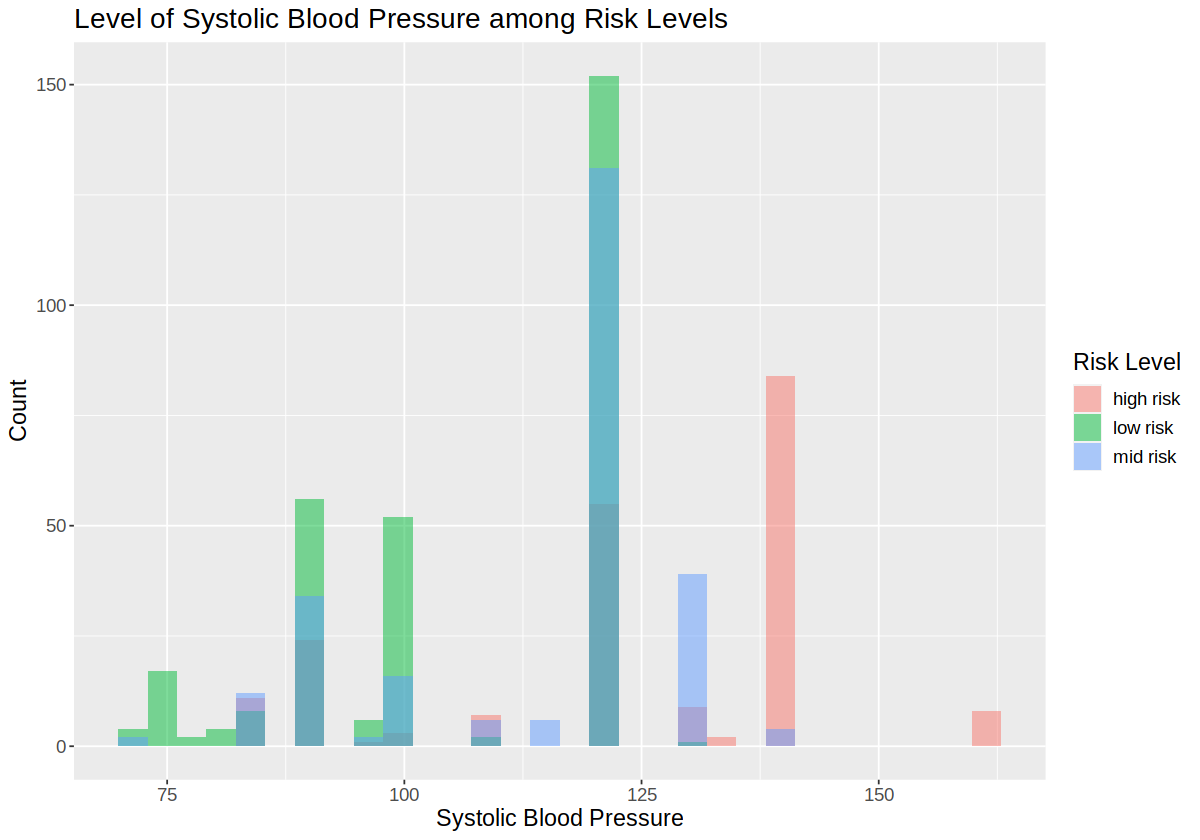

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


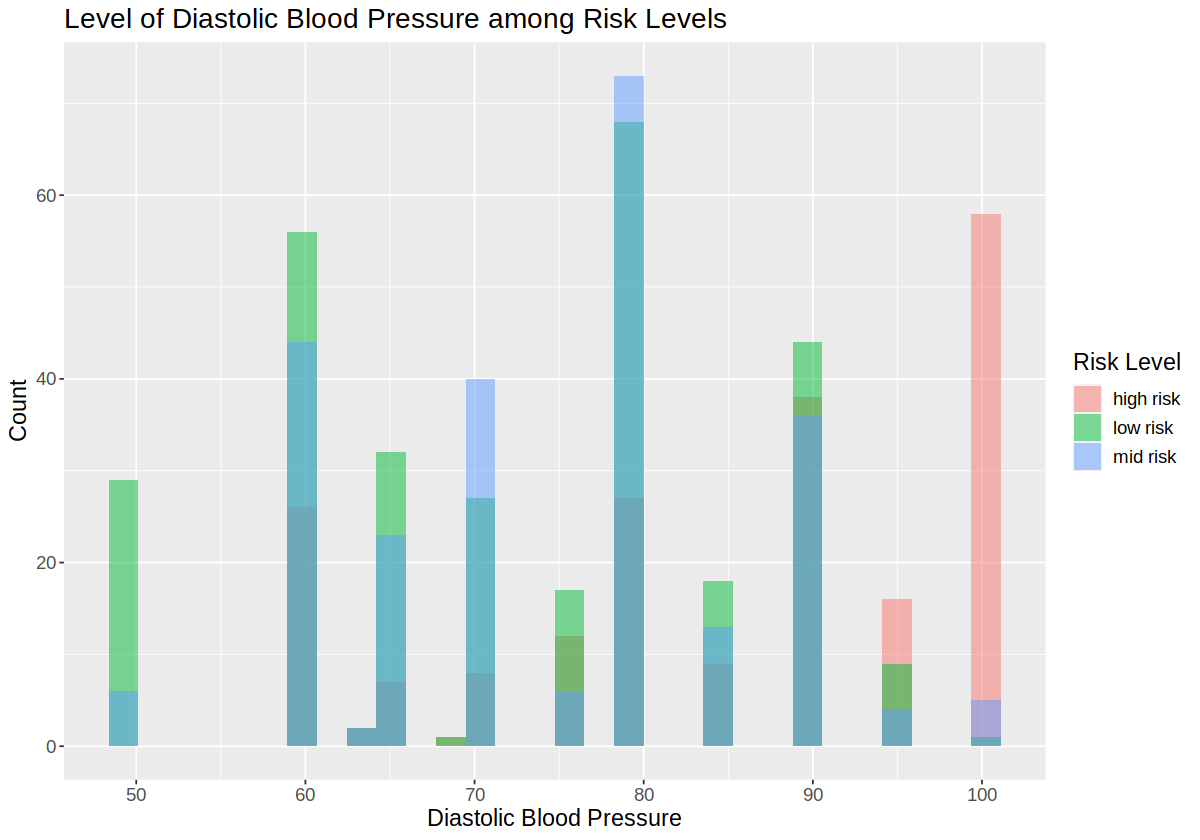

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


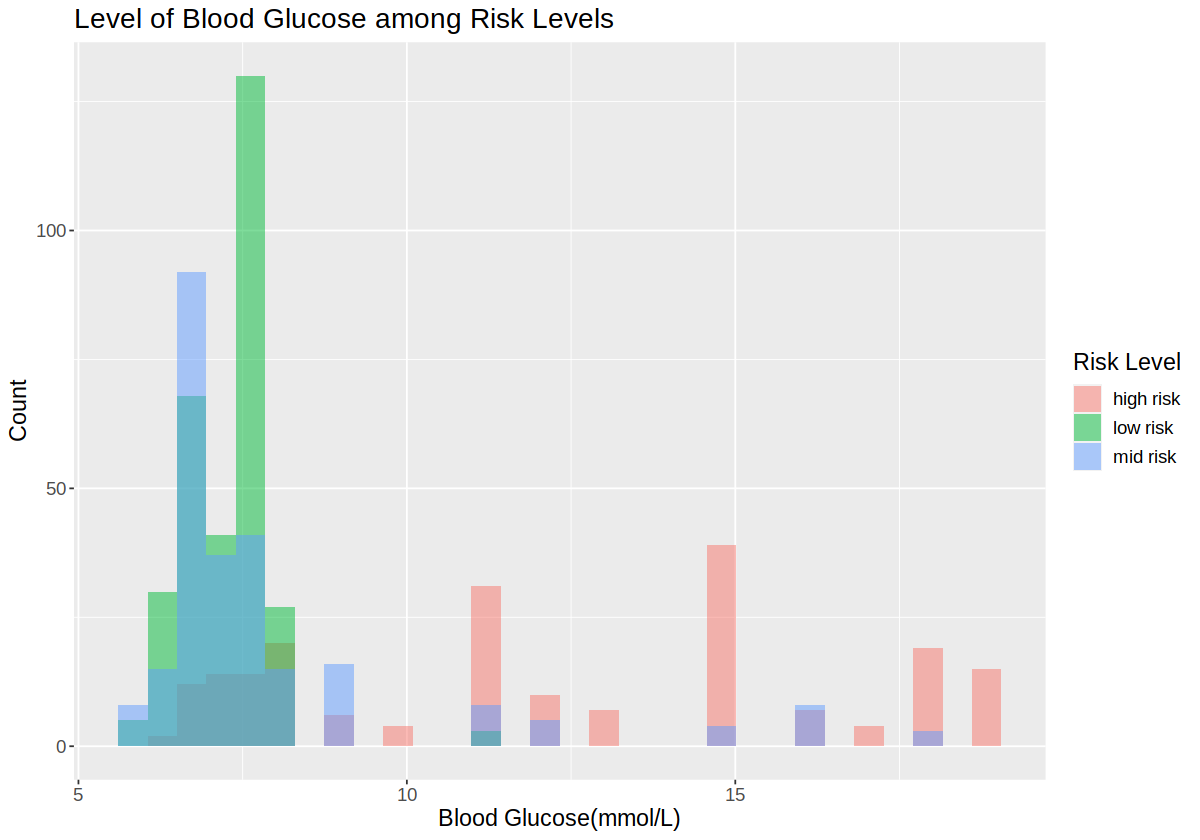

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


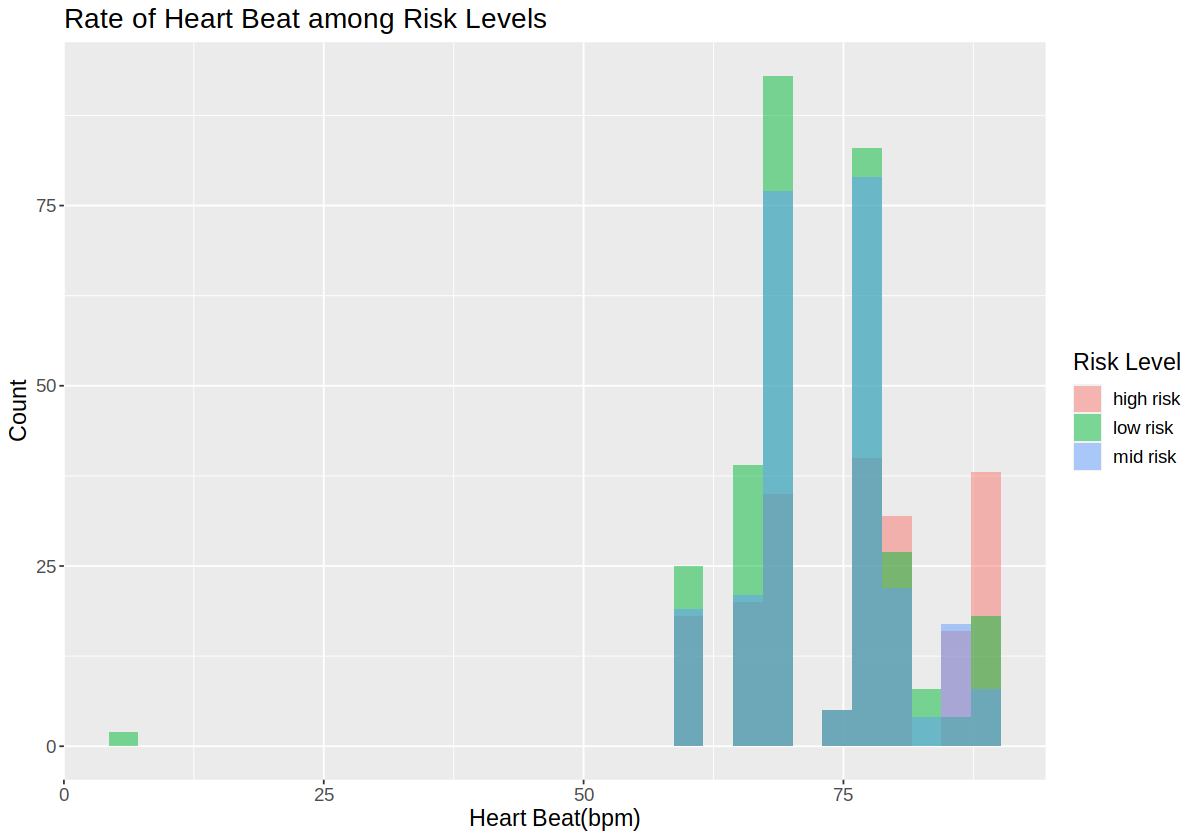

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


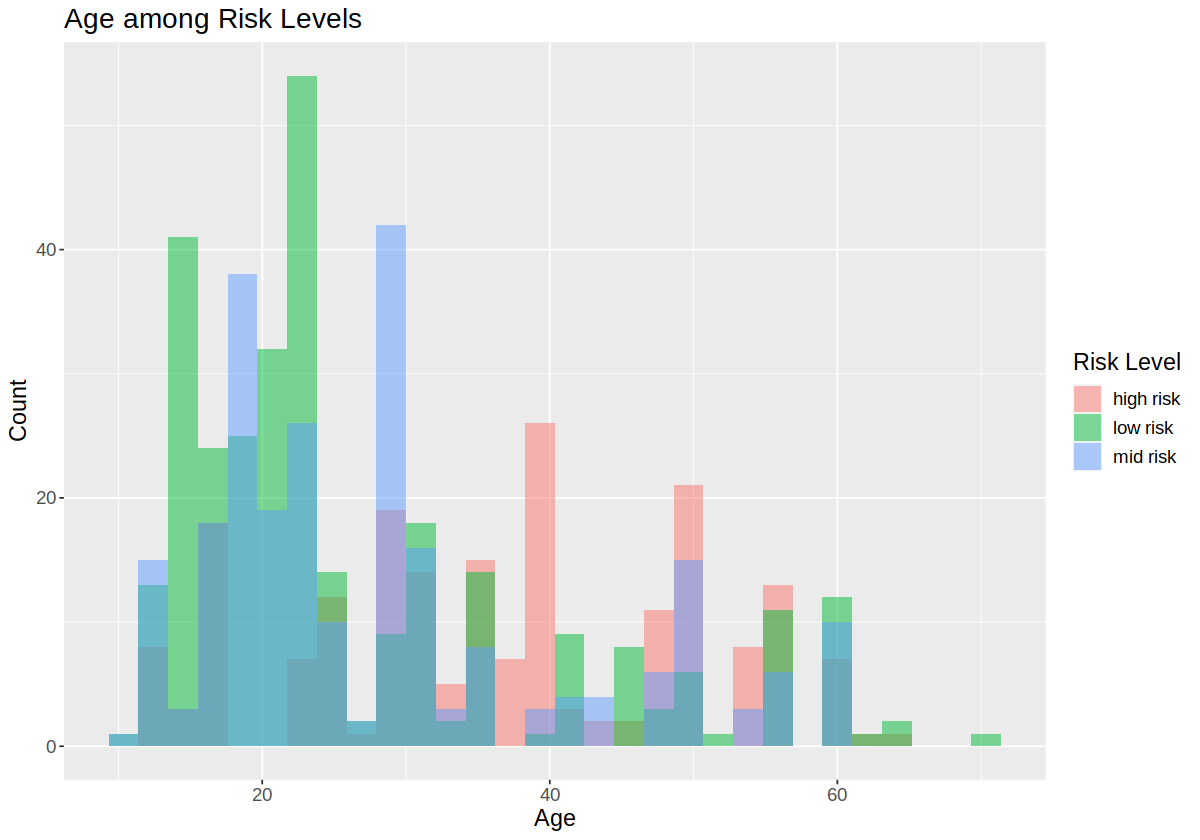

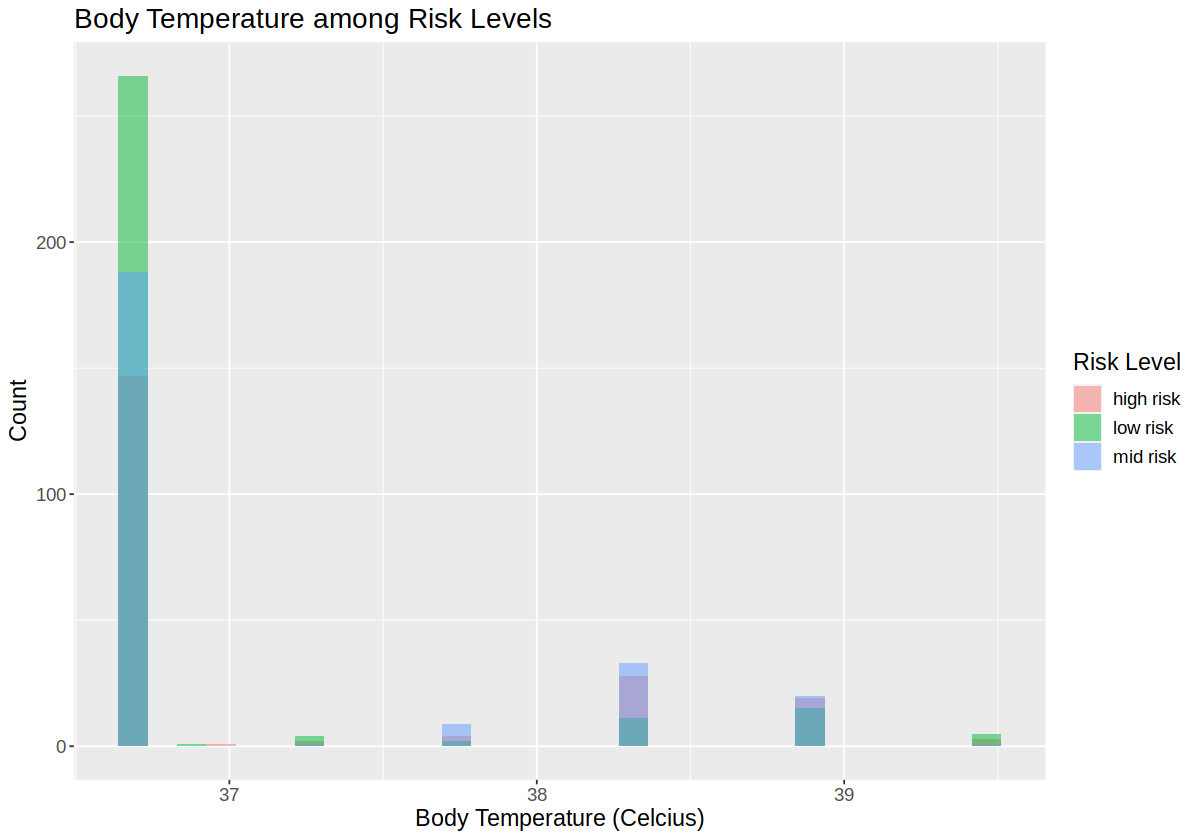

In [15]:
# examples of visualization we will use 
options(repr.plot.width = 10, repr.plot.height = 7) 
systolic_hisrogram <- ggplot(maternal_final, aes(x = Systolic_Blood_Pressure, fill = as_factor(Risk_Level))) +
                     geom_histogram(alpha = 0.5, position = "identity") +
                     labs(x = "Systolic Blood Pressure", fill = "Risk Level", y = "Count") +
                     ggtitle("Level of Systolic Blood Pressure among Risk Levels") +
                     theme(text = element_text(size = 14))
systolic_hisrogram

diastolic_histogram <- ggplot(maternal_final, aes(x = Diastolic_Blood_Pressure, fill = as_factor(Risk_Level))) +
                     geom_histogram(alpha = 0.5, position = "identity") +
                     labs(x = "Diastolic Blood Pressure", fill = "Risk Level", y = "Count") +
                     ggtitle("Level of Diastolic Blood Pressure among Risk Levels") +
                     theme(text = element_text(size = 14))
diastolic_histogram

bs_histogram <- ggplot(maternal_final, aes(x = Blood_Glucose, fill = as_factor(Risk_Level))) +
                     geom_histogram(alpha = 0.5, position = "identity") +
                     labs(x = "Blood Glucose(mmol/L)", fill = "Risk Level", y = "Count") +
                     ggtitle("Level of Blood Glucose among Risk Levels") +
                     theme(text = element_text(size = 14))
bs_histogram

heart_beat_histogram <- ggplot(maternal_final, aes(x = Heart_Beat, fill = as_factor(Risk_Level))) +
                     geom_histogram(alpha = 0.5, position = "identity") +
                     labs(x = "Heart Beat(bpm)", fill = "Risk Level", y = "Count") +
                     ggtitle("Rate of Heart Beat among Risk Levels") +
                     theme(text = element_text(size = 14))
heart_beat_histogram

age_histogram <- ggplot(maternal_final, aes(x = Age, fill = as_factor(Risk_Level))) +
                     geom_histogram(alpha = 0.5, position = "identity") +
                     labs(x = "Age", fill = "Risk Level", y = "Count") +
                     ggtitle("Age among Risk Levels") +
                     theme(text = element_text(size = 14))
age_histogram

body_temperature_histogram <- ggplot(maternal_final, aes(x = Body_Temperature, fill = as_factor(Risk_Level))) +
                     geom_histogram(alpha = 0.5, position = "identity") +
                     labs(x = "Body Temperature (Celcius)", fill = "Risk Level", y = "Count") +
                     ggtitle("Body Temperature among Risk Levels") +
                     theme(text = element_text(size = 14))
body_temperature_histogram

#### reminder for codes(delete later)
jief


#### Discussion

#### Reference